# Algoritmos Genéticos Hito 2

**Grupo 2**
* __Pedro Amaya Moreno__ (pedro.amaya@alumnos.upm.es)
* __Pedro Collado Rojas__ (p.collado@alumnos.upm.es)
* __Alejandro Álvarez Castro__ (alejandro.alvarez@alumnos.upm.es)
* __Alejandro Pardo Bascuñana__ (alejandro.pardo.bascunana@alumnos.upm.es)
* __Fernando Fernández Álvarez__ (fernando.fernandez.alvarez@alumnos.upm.es)

## Funciones para la detección de frentes

Para los algoritmos evolutivos que hemos usado, hemos implementado tanto el ranking de los puntos por el rango de los puntos o por el frente (como realiza NSGA2).

Para ello, usamos el concepto de matriz de dominancia en la cual:
$$(a_{ij} = 1, p_i domina p_j, sino a_{ij} = 0)$$

Tenemos la implementación inicial en [multiobj_utils](./examples/multiobj_utils.py), pero la implementación que acabamos usando estaría en [utils](./src/utils.py).

(1000, 2)


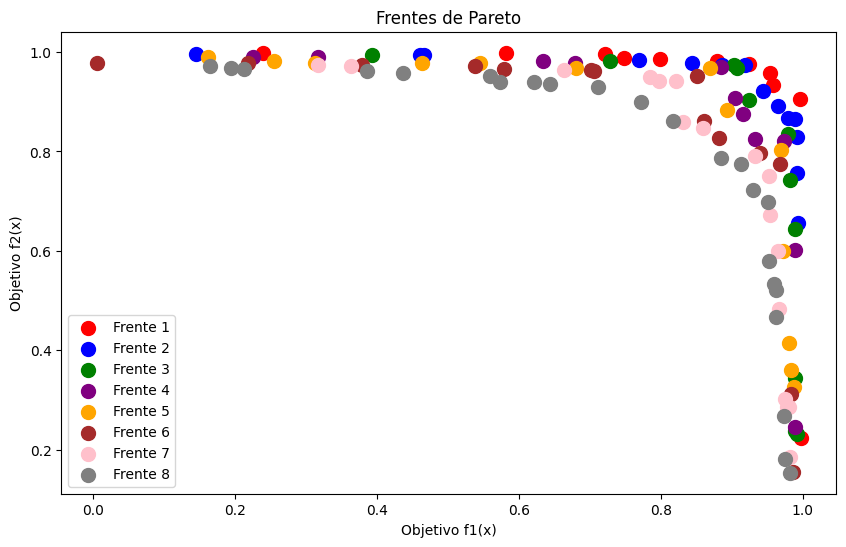

In [7]:
import examples.multiobj_utils as moutils
import numpy as np

num_points = 1000
dim = 2

# coordinates = np.random.randint(0, 100, (num_points, dim))
coordinates = np.random.random((num_points, dim))
print(coordinates.shape)

fronts = moutils.get_pareto_fronts(coordinates)

# print(distances)
moutils.plot_pareto_fronts(fronts)

Ploteamos también para mostrar los rangos de los puntos.

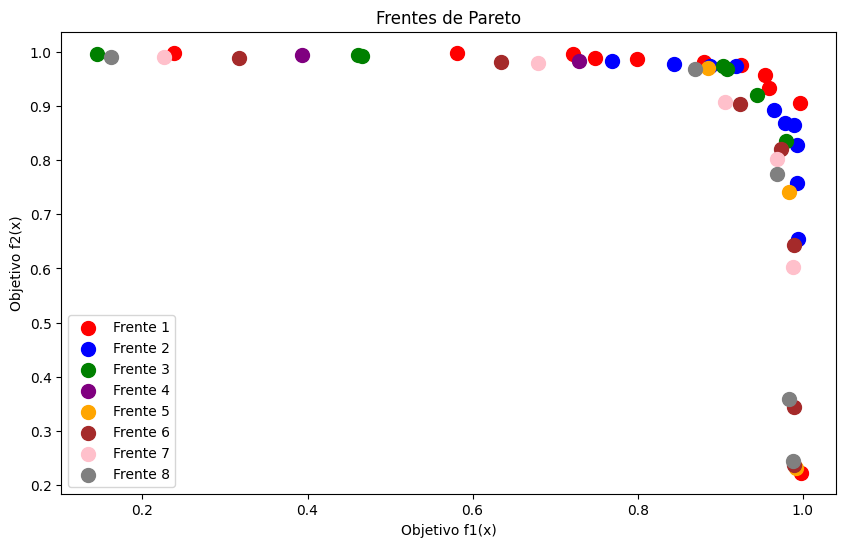

In [8]:
p_ranges = moutils.get_point_ranges(coordinates)
moutils.plot_pareto_fronts(p_ranges)

En nuestra implementación del algoritmo, usamos la distancia de crowding o los nichos de sharing para penalizar / mejorar el multi fit de los puntos que se encuentren en los bordes del conjunto o los puntos que estén muy cercanos entre si.

In [9]:
distances = moutils.get_crowding_distances(fronts)
print(distances)

[[0.12905376103153698, 0.9684499092593121, 0.09889235849851374, 0.23323418290093337, 0.6402195606891375, 0.18205157607864017, 0.12157569294435132, inf, 0.11275477596238924, 0.17968339559064747, inf], [0.4912028631056911, 0.38870822835228974, 0.1645991242417146, 0.3202152826350209, inf, 0.3974424655462177, inf, 0.5103942375336421, 0.1311360126850264, 0.19545000526728645, 0.29392953776328967, 0.09803903490468038, 0.1067718009388456, 0.22396337405747854], [0.31677355102508015, 0.87862374657336, inf, 0.12673344291683986, 0.5334735611579351, 0.1516495474126079, 0.5332521709388316, inf, 0.26659556577682325, 0.30951970193925726, 0.2941601078972476], [inf, 0.34438153139156763, 0.7917347969644907, 0.1471935032347541, 0.3922946697654167, 0.14830641088163463, 0.4888455097938291, inf, 0.5478053888345302, 0.16777187192777676, 0.371767879900861], [0.14143691627416097, 0.28188659960834045, 0.5993872008824314, 0.27671772367057956, 0.36886605690373503, inf, 0.40710176160420153, inf, 0.3762773136472308,

Vemos también un ejemplo de los frentes para 3 dimensiones.

In [10]:
num_points = 1000
dim = 3

# coordinates = np.random.randint(0, 100, (num_points, dim))
coordinates = np.random.random((num_points, dim))
print(coordinates.shape)

fronts = moutils.get_pareto_fronts(coordinates)

# distances = moutils.get_crowding_distances(fronts)
# print(distances)
moutils.plot_pareto_fronts_3d(fronts)

(1000, 3)


## Problema ZDT1

En nuestro caso, a base de prueba y error, observamos que nuestro algoritmo funcionaba mejor cuando tenía más generaciones para poder buscar con mayor profundidad mejores respuestas.

Para ello, encontramos que la siguiente combinación de parámetros era muy efectiva para encontrar soluciones al problema, usado los frentes del NSGA2 y la distancia de crowding normalizada.

Generation       50 | Population Elite Points:      384 | Zitlerd: 0.8408 | Spa: 0.0160 | Hrs: 0.8281 | Gdplus: 0.3580 | Igdplus: 0.3289 | Hv: 0.2253
Generation      100 | Population Elite Points:      773 | Zitlerd: 0.9020 | Spa: 0.0106 | Hrs: 0.8904 | Gdplus: 0.0370 | Igdplus: 0.0356 | Hv: 0.6044
Generation      150 | Population Elite Points:     1251 | Zitlerd: 0.9592 | Spa: 0.0081 | Hrs: 0.9003 | Gdplus: 0.0062 | Igdplus: 0.0057 | Hv: 0.6561
Generation      200 | Population Elite Points:     1940 | Zitlerd: 1.0260 | Spa: 0.0049 | Hrs: 0.9003 | Gdplus: 0.0031 | Igdplus: 0.0022 | Hv: 0.6625


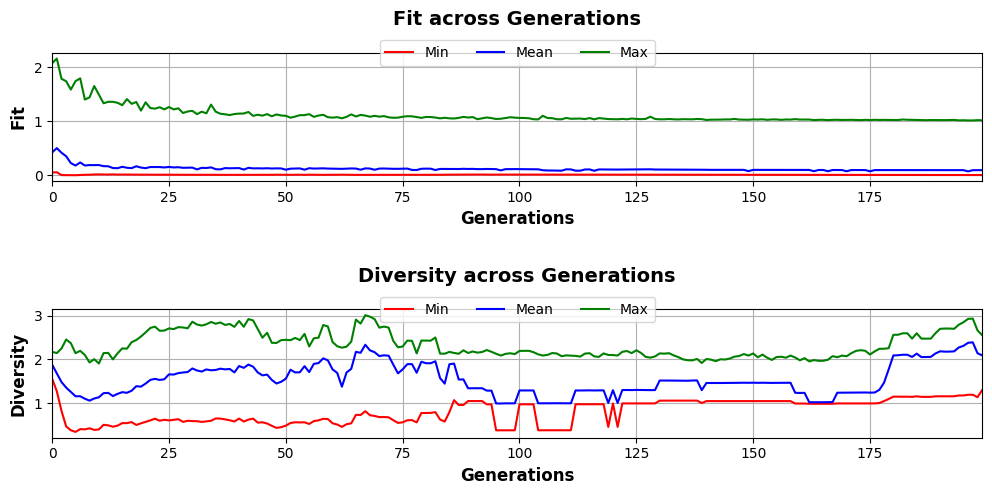

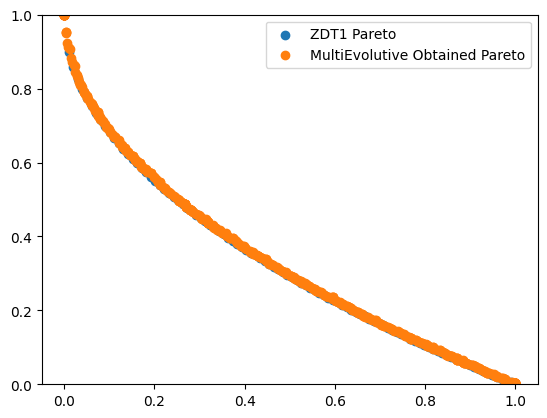

In [1]:
from pymoo.problems import get_problem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import examples.multiobj_utils as multi_obj
import examples.multi_animation as multi_anm

problem = get_problem("zdt1")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
multi_obj.plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT1', ylim=[0, 1])

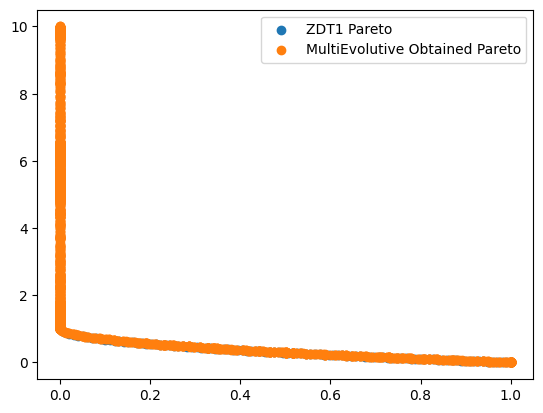

In [3]:
multi_obj.plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT1')

In [ ]:
multi_obj.plot_pareto_front_3d(problem.pareto_front(), fit_scores, 'Obtained', 'ZDT1')

Viendo la evolución en la siguiente animación:

Generation       20 | Population Elite Points:      181 | Zitlerd: 0.9456 | Spa: 0.0351 | Hrs: 0.7981 | Gdplus: 0.7774 | Igdplus: 0.7895 | Hv: 0.0041
--------------
Generation       20 | Population Elite Points:      368 | Zitlerd: 0.8287 | Spa: 0.0162 | Hrs: 0.8624 | Gdplus: 0.3877 | Igdplus: 0.3384 | Hv: 0.2119
--------------
Generation       20 | Population Elite Points:      529 | Zitlerd: 0.8481 | Spa: 0.0133 | Hrs: 0.8777 | Gdplus: 0.1546 | Igdplus: 0.1481 | Hv: 0.4399
--------------
Generation       20 | Population Elite Points:      655 | Zitlerd: 0.8134 | Spa: 0.0111 | Hrs: 0.8946 | Gdplus: 0.0713 | Igdplus: 0.0647 | Hv: 0.5562
--------------
Generation       20 | Population Elite Points:      816 | Zitlerd: 0.8515 | Spa: 0.0097 | Hrs: 0.8936 | Gdplus: 0.0398 | Igdplus: 0.0375 | Hv: 0.6010
--------------
Generation       20 | Population Elite Points:      948 | Zitlerd: 0.8578 | Spa: 0.0082 | Hrs: 0.9022 | Gdplus: 0.0187 | Igdplus: 0.0171 | Hv: 0.6367
--------------
Generation

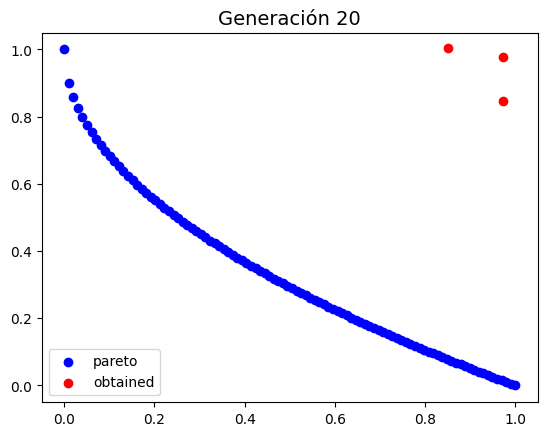

In [4]:
from IPython.display import HTML

GENERATIONS = 200
IND_PER_GENERATION = 20

animation = multi_anm.Animation(problem, GENERATIONS, IND_PER_GENERATION)

anim = animation.evolve_step_by_step(evolutive, fit=problem.evaluate)

HTML(anim.to_html5_video())

Usando NSGA2 para compararlos:

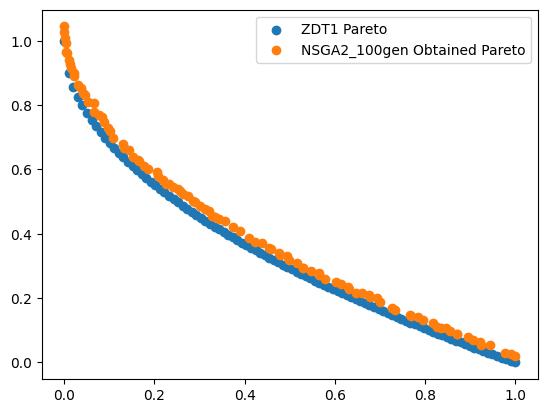

In [2]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results_nsga2 = res.F

multi_obj.plot_pareto_front(pareto_front, obtained_results_nsga2, 'NSGA2_100gen', 'ZDT1')

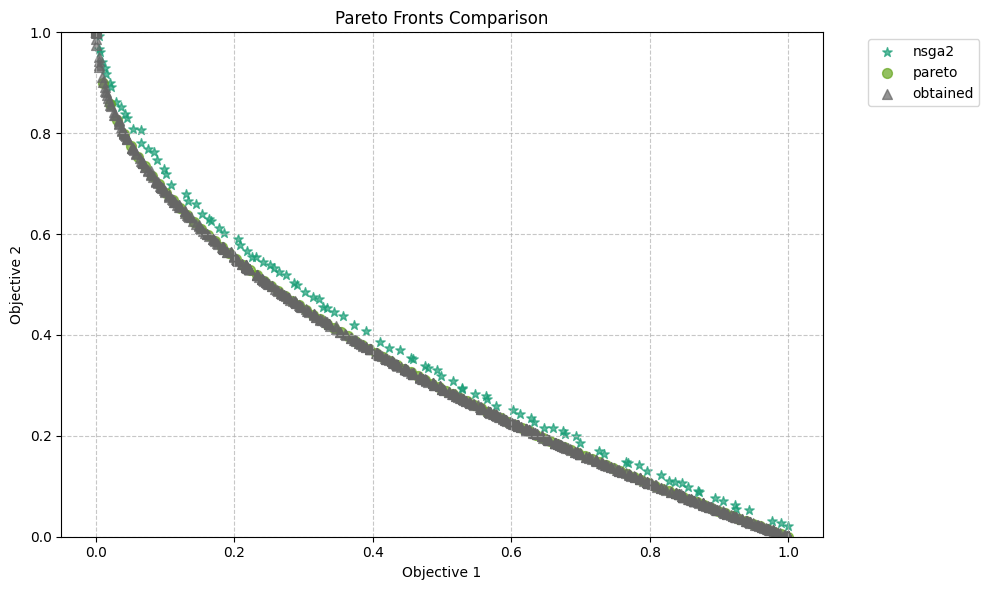

In [3]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": obtained_results_nsga2,
        "pareto": problem.pareto_front(),
        "obtained": fit_scores
    },
    ylim=[0, 1]
)

In [7]:
import time

metrics = []
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    limits=[[0, 1.05], [0, 1.05]]
)
results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(evolutive.evolve(fit=problem.evaluate, n_generations=200))
    timings += time.perf_counter() - start
res_metrics = evaluation([res["best"] for res in results])
res_metrics["last_update_avg"] = sum(res["last_update"] for res in results) / 10
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "obtained"
metrics.append(res_metrics)

In [8]:
algorithm = NSGA2(pop_size=100)

results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False).X)
    timings += time.perf_counter() - start
res_metrics = evaluation(results)
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "nsga2"
metrics.append(res_metrics)

In [9]:
from src.evaluation.eval_utils import to_pd_dataframe
to_pd_dataframe(metrics, exclude_values=("evaluation_results", "mean_front"))

,ZitlerD,SPA,HRS,GDPlus,IGDPlus,HV,mean_points,last_update_avg,time_per_evol,id
0,1.079282,0.002396,0.050003,0.003768,0.002846,0.660964,637.8,200.0,13.073547,obtained
1,0.306261,0.004571,0.029084,0.015489,0.015953,0.640148,100.0,NaN,0.826006,nsga2


Esta es una representación que trata de asimilar el frente medio que se obtiene con los algoritmos, escogiendo a partir del número k mínimo de puntos que se ha encontrado la media de los k clusters más relevantes de los conjuntos.

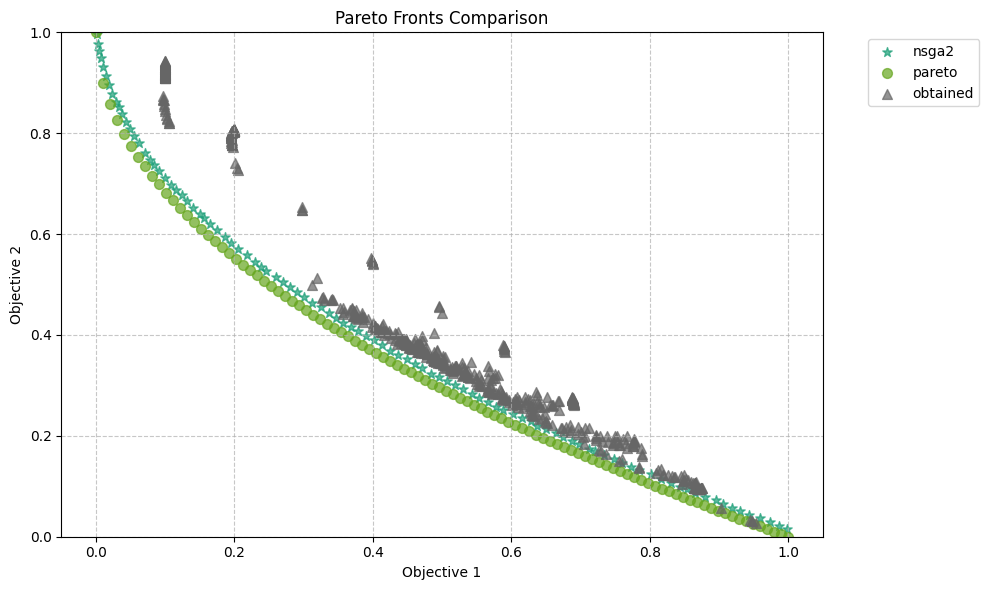

In [10]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": metrics[1]["mean_front"],
        "pareto": problem.pareto_front(),
        "obtained": metrics[0]["mean_front"]
    },
    ylim=[0, 1]
)

## Problema ZDT3

Usamos los mismos parametros que usamos previamente para obtenerlo.

Generation       50 | Population Elite Points:      394 | Zitlerd: 0.8156 | Spa: 0.0161 | Hrs: 0.7793 | Gdplus: 0.3051 | Igdplus: 0.4255 | Hv: 0.3699
Generation      100 | Population Elite Points:      770 | Zitlerd: 0.8392 | Spa: 0.0099 | Hrs: 0.8193 | Gdplus: 0.0411 | Igdplus: 0.0514 | Hv: 0.9195
Generation      150 | Population Elite Points:     1224 | Zitlerd: 0.9531 | Spa: 0.0076 | Hrs: 0.8360 | Gdplus: 0.0071 | Igdplus: 0.0083 | Hv: 1.0182
Generation      200 | Population Elite Points:     1698 | Zitlerd: 1.0347 | Spa: 0.0059 | Hrs: 0.8363 | Gdplus: 0.0030 | Igdplus: 0.0027 | Hv: 1.0367


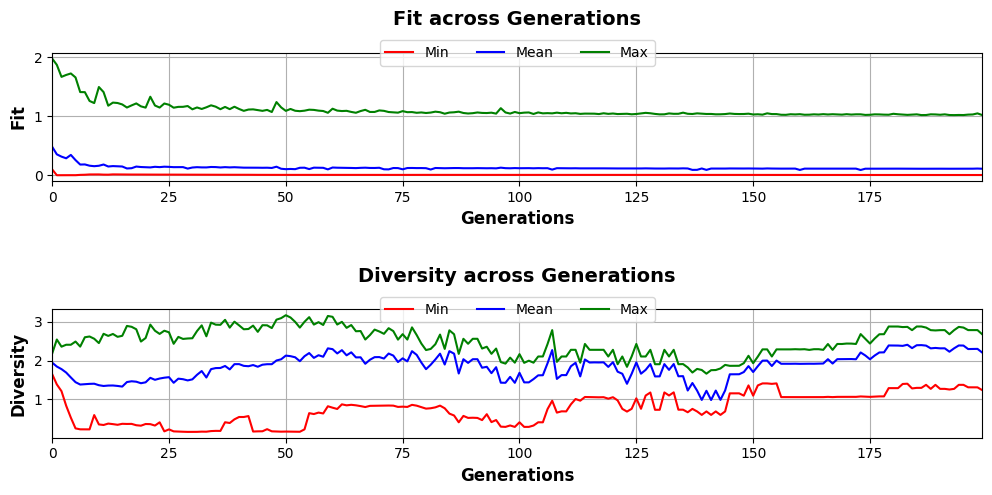

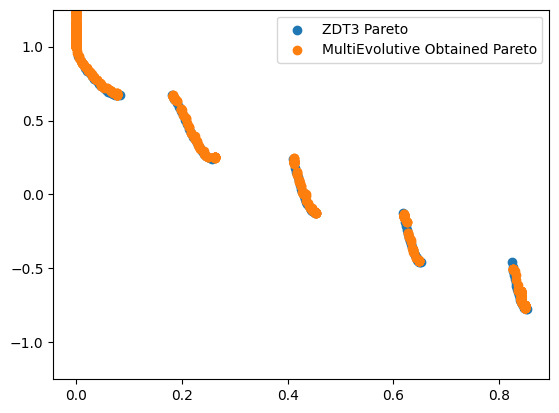

In [12]:
from pymoo.problems import get_problem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import examples.multiobj_utils as multi_obj
import examples.multi_animation as multi_anm

problem = get_problem("zdt3")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
multi_obj.plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT3', ylim=[-1.25, 1.25])

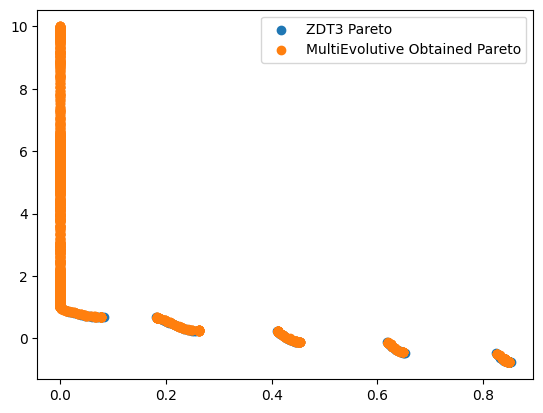

In [13]:
multi_obj.plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT3')

In [14]:
multi_obj.plot_pareto_front_3d(problem.pareto_front(), fit_scores, 'Obtained', 'ZDT3')

Generation       20 | Population Elite Points:      121 | Zitlerd: 0.9546 | Spa: 0.1003 | Hrs: 0.6175 | Gdplus: 0.5890 | Igdplus: 0.7266 | Hv: 0.1343
--------------
Generation       20 | Population Elite Points:      345 | Zitlerd: 0.8662 | Spa: 0.0267 | Hrs: 0.8058 | Gdplus: 0.2809 | Igdplus: 0.3216 | Hv: 0.4505
--------------
Generation       20 | Population Elite Points:      474 | Zitlerd: 0.9294 | Spa: 0.0242 | Hrs: 0.8096 | Gdplus: 0.0887 | Igdplus: 0.1454 | Hv: 0.7521
--------------
Generation       20 | Population Elite Points:      660 | Zitlerd: 0.8927 | Spa: 0.0138 | Hrs: 0.8166 | Gdplus: 0.0685 | Igdplus: 0.0965 | Hv: 0.8406
--------------
Generation       20 | Population Elite Points:      860 | Zitlerd: 0.9274 | Spa: 0.0110 | Hrs: 0.8353 | Gdplus: 0.0225 | Igdplus: 0.0369 | Hv: 0.9482
--------------
Generation       20 | Population Elite Points:      906 | Zitlerd: 0.9665 | Spa: 0.0115 | Hrs: 0.8373 | Gdplus: 0.0117 | Igdplus: 0.0158 | Hv: 1.0001
--------------
Generation

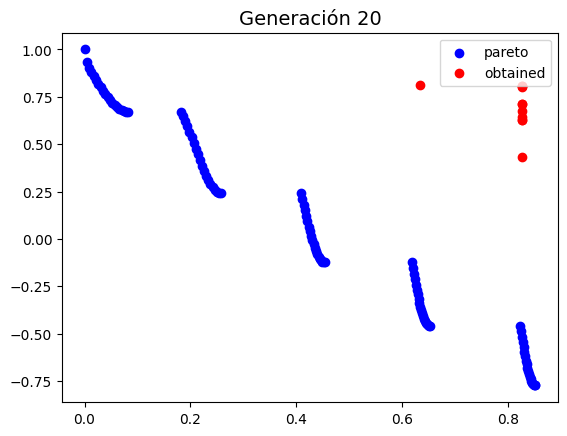

In [16]:
from IPython.display import HTML

GENERATIONS = 200
IND_PER_GENERATION = 20

animation = multi_anm.Animation(problem, GENERATIONS, IND_PER_GENERATION)

anim = animation.evolve_step_by_step(evolutive, fit=problem.evaluate, trace=20)

HTML(anim.to_html5_video())

Usando NSGA2 para compararlos:

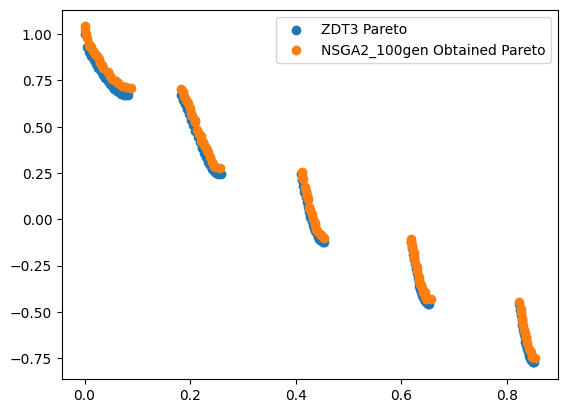

In [17]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results_nsga2 = res.F

multi_obj.plot_pareto_front(pareto_front, obtained_results_nsga2, 'NSGA2_100gen', 'ZDT3')

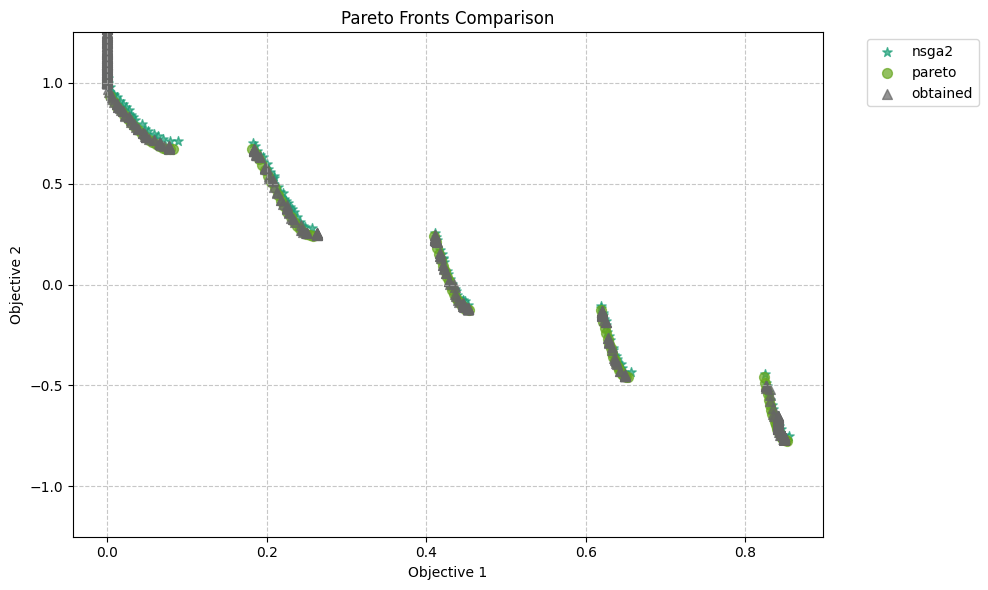

In [19]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": obtained_results_nsga2,
        "pareto": problem.pareto_front(),
        "obtained": fit_scores
    },
    ylim=[-1.25, 1.25]
)

In [20]:
import time

metrics = []
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    limits=[[0, 1.25], [0, 1.25]]
)
results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(evolutive.evolve(fit=problem.evaluate, n_generations=200))
    timings += time.perf_counter() - start
res_metrics = evaluation([res["best"] for res in results])
res_metrics["last_update_avg"] = sum(res["last_update"] for res in results) / 10
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "obtained"
metrics.append(res_metrics)

In [22]:
algorithm = NSGA2(pop_size=100)

results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False).X)
    timings += time.perf_counter() - start
res_metrics = evaluation(results)
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "nsga2"
metrics.append(res_metrics)

In [23]:
from src.evaluation.eval_utils import to_pd_dataframe
to_pd_dataframe(metrics, exclude_values=("evaluation_results", "mean_front"))

,ZitlerD,SPA,HRS,GDPlus,IGDPlus,HV,mean_points,last_update_avg,time_per_evol,id
0,1.157937,0.004010,0.202343,0.003614,0.216760,0.787871,370.2,200.0,11.694114,obtained
1,0.366556,0.006409,0.137714,0.009343,0.222403,0.773238,59.9,NaN,0.861289,nsga2


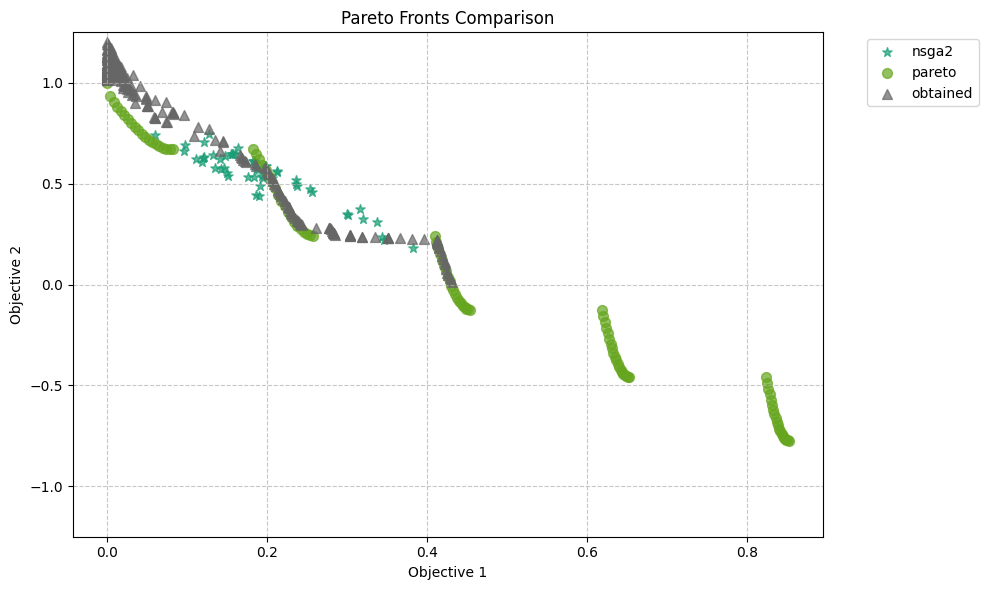

In [24]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": metrics[1]["mean_front"],
        "pareto": problem.pareto_front(),
        "obtained": metrics[0]["mean_front"]
    },
    ylim=[-1.25, 1.25]
)

## Problema MW7

La primera aproximación que hicimos fue penalizar la función de evaluación si no se cumplen las restricciones:

Generation       50 | Population Elite Points:      133 | Zitlerd: 1.0209 | Spa: 0.0178 | Hrs: 0.1216 | Gdplus: 0.0281 | Igdplus: 0.0396 | Hv: 3.0042
Generation      100 | Population Elite Points:      316 | Zitlerd: 1.3204 | Spa: 0.0101 | Hrs: 0.1197 | Gdplus: 0.0200 | Igdplus: 0.0294 | Hv: 3.0162
Generation      150 | Population Elite Points:      477 | Zitlerd: 1.4350 | Spa: 0.0085 | Hrs: 0.1197 | Gdplus: 0.0187 | Igdplus: 0.0244 | Hv: 3.0209
Generation      200 | Population Elite Points:      628 | Zitlerd: 1.5093 | Spa: 0.0053 | Hrs: 0.1196 | Gdplus: 0.0146 | Igdplus: 0.0217 | Hv: 3.0259


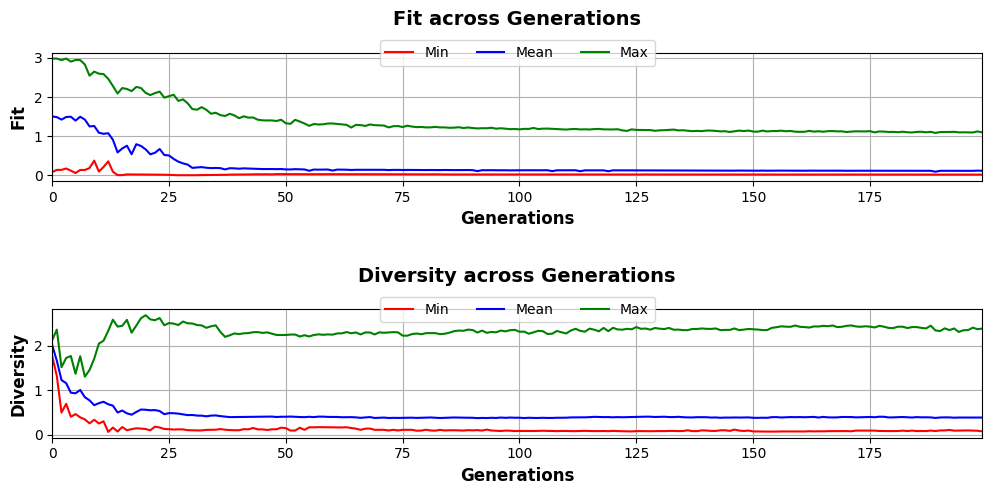

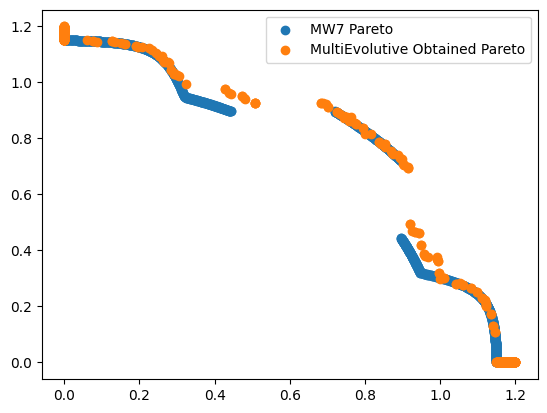

In [1]:
from pymoo.problems import get_problem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import examples.multiobj_utils as multi_obj
import examples.multi_animation as multi_anm

problem = get_problem("mw7")
mw7_pen = multi_obj.penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('lteq', 0), ('lteq', 0)], epsilon=100.)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool="best",
    selection_pool_size=1.,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.,
    T_selection=6,
    fit_penalization=[(0., 1.25), (0., 1.25)],
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=mw7_pen, n_generations=200, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([problem.evaluate(p)[0] for p in results["best"]])
# obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

multi_obj.plot_pareto_front(pareto_front, obtained_results, 'MultiEvolutive', 'MW7')

No funcionaba muy bien para ajustarse al problema, por lo que modificamos como se calculaba la matriz de dominancia para que los puntos que cumplan las restricciones siempre dominen a los puntos que nos las cumplen.

Generation       50 | Population Elite Points:       74 | Zitlerd: 1.1390 | Spa: 0.0458 | Hrs: 0.1374 | Gdplus: 0.0312 | Igdplus: 0.0677 | Hv: 2.9066
Generation      100 | Population Elite Points:      272 | Zitlerd: 1.3697 | Spa: 0.0112 | Hrs: 0.1187 | Gdplus: 0.0209 | Igdplus: 0.0283 | Hv: 3.0138
Generation      150 | Population Elite Points:      492 | Zitlerd: 1.5138 | Spa: 0.0079 | Hrs: 0.1167 | Gdplus: 0.0152 | Igdplus: 0.0234 | Hv: 3.0175
Generation      200 | Population Elite Points:      829 | Zitlerd: 1.6449 | Spa: 0.0056 | Hrs: 0.1164 | Gdplus: 0.0154 | Igdplus: 0.0213 | Hv: 3.0215


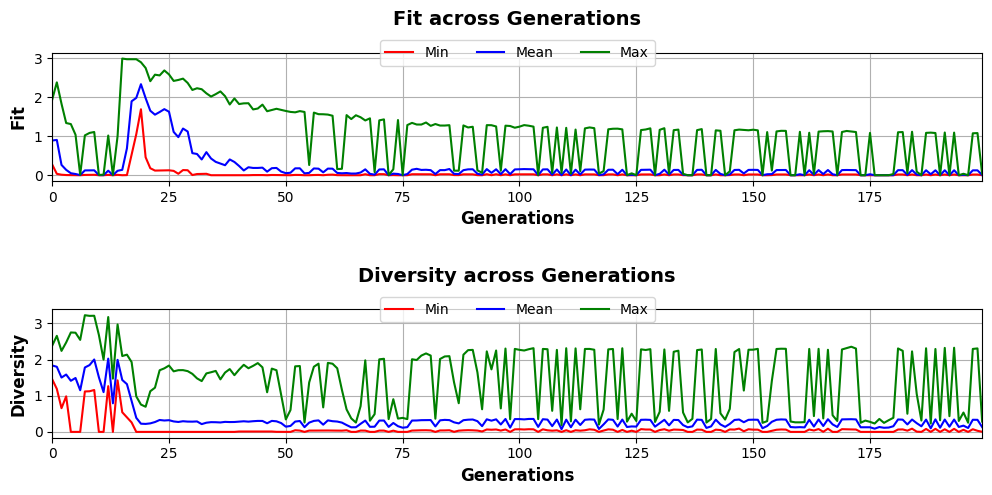

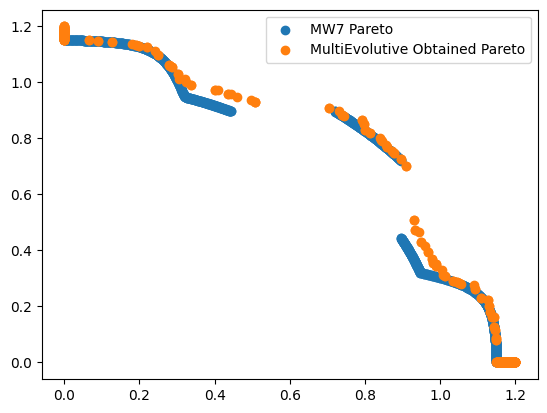

In [28]:
problem = get_problem("mw7")
# mw7_pen = penalized_fit(problem.evaluate, maximize=[False, False], restrictions=[('greq', 0), ('lteq', 0)], epsilon=100.)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    restrictions=[('lteq', 0), ('lteq', 0)],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    selection_pool=["best", "section"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.75,
    elitism=True,
    alpha=0.8,
    T_selection=8,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
fit_scores = np.array([problem.evaluate(p)[0] for p in results["best"]])

multi_obj.plot_pareto_front(pareto_front, fit_scores, 'MultiEvolutive', 'MW7')

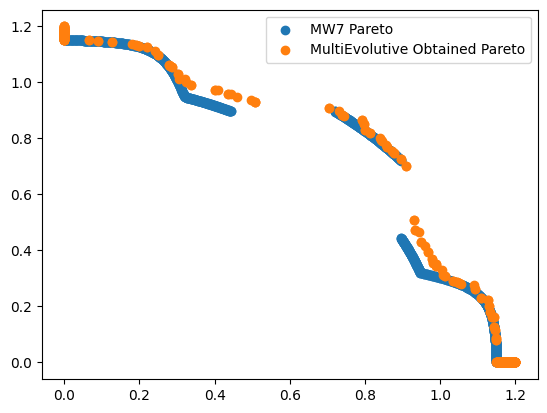

In [29]:
multi_obj.plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'MW7')

In [30]:
multi_obj.plot_pareto_front_3d(problem.pareto_front(), fit_scores, 'Obtained', 'MW7')

Generation       20 | Population Elite Points:      645 | Zitlerd: 1.1745 | Spa: 0.0438 | Hrs: 0.3354 | Gdplus: 0.0000 | Igdplus: 0.0000 | Hv: 1.7139
--------------
Generation       20 | Population Elite Points:        5 | Zitlerd: 1.4308 | Spa: 0.3435 | Hrs: 0.9410 | Gdplus: 0.0802 | Igdplus: 0.2003 | Hv: 2.1340
--------------
Generation       20 | Population Elite Points:       27 | Zitlerd: 1.0961 | Spa: 0.0785 | Hrs: 0.3107 | Gdplus: 0.0392 | Igdplus: 0.1249 | Hv: 2.6212
--------------
Generation       20 | Population Elite Points:      101 | Zitlerd: 1.1033 | Spa: 0.0233 | Hrs: 0.1373 | Gdplus: 0.0326 | Igdplus: 0.0629 | Hv: 2.9995
--------------
Generation       20 | Population Elite Points:      158 | Zitlerd: 1.2512 | Spa: 0.0184 | Hrs: 0.1372 | Gdplus: 0.0272 | Igdplus: 0.0607 | Hv: 3.0046
--------------
Generation       20 | Population Elite Points:      243 | Zitlerd: 1.4234 | Spa: 0.0146 | Hrs: 0.1324 | Gdplus: 0.0221 | Igdplus: 0.0325 | Hv: 3.0103
--------------
Generation

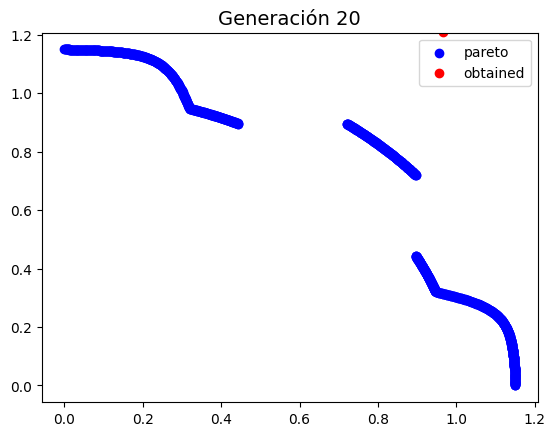

In [33]:
from IPython.display import HTML

GENERATIONS = 200
IND_PER_GENERATION = 20

animation = multi_anm.Animation(problem, GENERATIONS, IND_PER_GENERATION)

anim = animation.evolve_step_by_step(evolutive, fit=problem.evaluate, trace=20)

HTML(anim.to_html5_video())

Usando NSGA2 para compararlos:

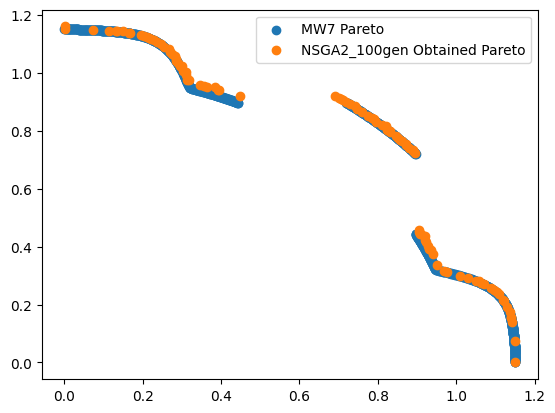

In [39]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results_nsga2 = res.F

multi_obj.plot_pareto_front(pareto_front, obtained_results_nsga2, 'NSGA2_100gen', 'MW7')

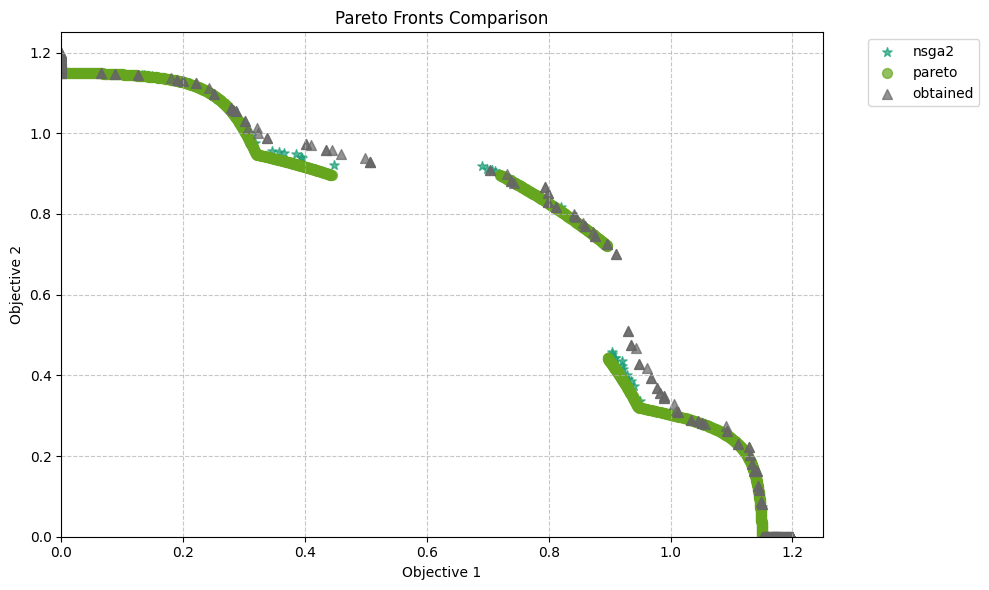

In [41]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": obtained_results_nsga2,
        "pareto": problem.pareto_front(),
        "obtained": fit_scores
    },
    ylim=[0, 1.25],
    xlim=[0, 1.25]
)

In [3]:
import time

metrics = []
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    restrictions=[('lteq', 0), ('lteq', 0)],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    selection_pool=["best", "section"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.75,
    elitism=True,
    alpha=0.8,
    T_selection=8,
    evaluation_metrics=evaluation
)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    limits=[[0, 1.25], [0, 1.25]],
    restrictions=True
)
results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(evolutive.evolve(fit=problem.evaluate, n_generations=200))
    timings += time.perf_counter() - start
res_metrics = evaluation([res["best"] for res in results])
res_metrics["last_update_avg"] = sum(res["last_update"] for res in results) / 10
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "obtained"
metrics.append(res_metrics)

In [4]:
algorithm = NSGA2(pop_size=100)

results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False).X)
    timings += time.perf_counter() - start
res_metrics = evaluation(results)
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "nsga2"
metrics.append(res_metrics)

In [5]:
from src.evaluation.eval_utils import to_pd_dataframe
to_pd_dataframe(metrics, exclude_values=("evaluation_results", "mean_front"))

,ZitlerD,SPA,HRS,GDPlus,IGDPlus,HV,mean_points,last_update_avg,time_per_evol,id
0,1.674200,0.007256,0.114093,0.024698,0.033458,0.092651,805.5,200.0,4.922108,obtained
1,0.360855,0.005431,0.210485,0.005349,0.011348,0.120256,100.0,NaN,1.201766,nsga2


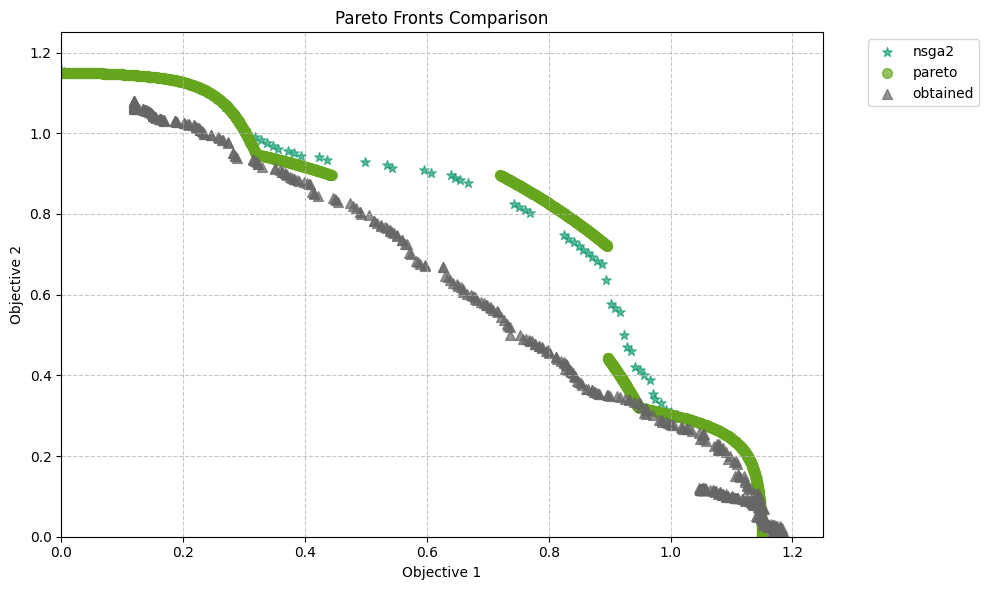

In [7]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2": metrics[1]["mean_front"],
        "pareto": problem.pareto_front(),
        "obtained": metrics[0]["mean_front"]
    },
    ylim=[0, 1.25],
    xlim=[0, 1.25]
)

## Problem MW14

/Users/pedro/dev/bioinspired-evo/src/utils.py:83: RuntimeWarning:

divide by zero encountered in divide

/Users/pedro/dev/bioinspired-evo/src/utils.py:83: RuntimeWarning:

invalid value encountered in divide

/Users/pedro/dev/bioinspired-evo/src/utils.py:78: RuntimeWarning:

invalid value encountered in subtract



Generation       50 | Population Elite Points:      650 | Zitlerd: 1.4226 | Spa: 0.0032 | Hrs: 0.8262 | Gdplus: 0.0000 | Igdplus: 0.0000 | Hv: 0.5037
Generation      100 | Population Elite Points:     1228 | Zitlerd: 1.1249 | Spa: 0.0030 | Hrs: 0.6396 | Gdplus: 0.0752 | Igdplus: 1.1762 | Hv: 0.5591
Generation      150 | Population Elite Points:     1604 | Zitlerd: 1.0674 | Spa: 0.0035 | Hrs: 0.5797 | Gdplus: 0.0678 | Igdplus: 1.1555 | Hv: 0.5942
Generation      200 | Population Elite Points:     1258 | Zitlerd: 0.9802 | Spa: 0.0051 | Hrs: 0.8916 | Gdplus: 0.0671 | Igdplus: 1.1292 | Hv: 0.6392


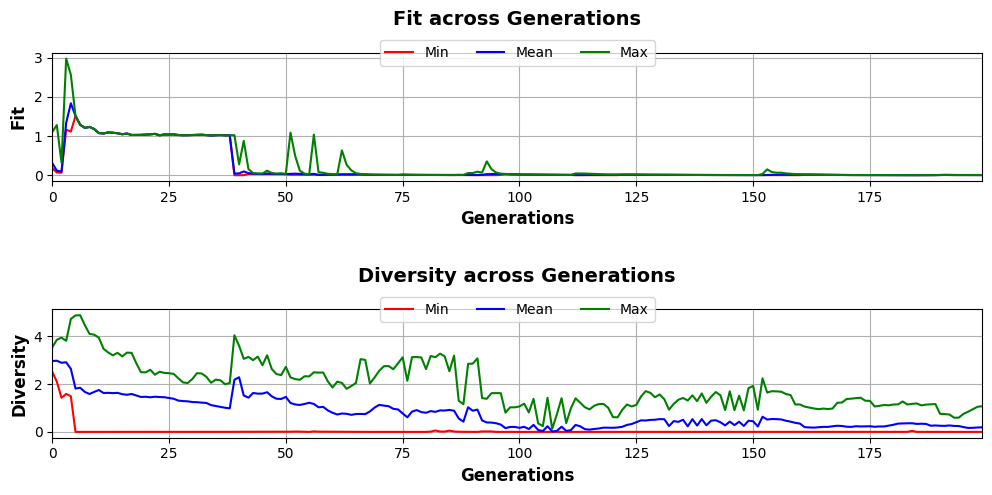

In [19]:
from pymoo.problems import get_problem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import examples.multiobj_utils as multi_obj

problem = get_problem("mw14", n_var=30, n_obj=3)
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2., 2.),
    # limits=[[0, 1.25], [0, 1.25], [0, 1.25]],
    restrictions=True
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1.5],
    maximize=[False, False, False],
    restrictions=[('lteq', 0)],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    selection_pool="best",
    front='front',
    penalization='crowding_norm',
    selection_pool_size=1.,
    average_mutation_rate=2.,
    mutation_eps=1.25,
    elitism=True,
    alpha=0.8,
    T_selection=6,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p)[0] for p in results["best"]])
multi_obj.plot_pareto_front_3d(problem.pareto_front(), fit_scores, 'Obtained', 'MW14')

In [ ]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

multi_obj.plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW14')

In [ ]:
import time

metrics = []
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(2., 2., 2.),
    # limits=[[0, 1.25], [0, 1.25], [0, 1.25]],
    restrictions=True
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1.5],
    maximize=[False, False, False],
    restrictions=[('lteq', 0)],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    selection_pool="best",
    front='front',
    penalization='crowding_norm',
    selection_pool_size=1.,
    average_mutation_rate=2.,
    mutation_eps=1.25,
    elitism=True,
    alpha=0.8,
    T_selection=6,
    evaluation_metrics=evaluation
)
results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(evolutive.evolve(fit=problem.evaluate, n_generations=200))
    timings += time.perf_counter() - start
res_metrics = evaluation([res["best"] for res in results])
res_metrics["last_update_avg"] = sum(res["last_update"] for res in results) / 10
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "obtained"
metrics.append(res_metrics)

In [ ]:
algorithm = NSGA2(pop_size=100)

results = []
timings = 0
for _ in range(10):
    start = time.perf_counter()
    results.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False).X)
    timings += time.perf_counter() - start
res_metrics = evaluation(results)
res_metrics["time_per_evol"] = timings / 10
res_metrics["id"] = "nsga2"
metrics.append(res_metrics)

In [ ]:
from src.evaluation.eval_utils import to_pd_dataframe
to_pd_dataframe(metrics, exclude_values=("evaluation_results", "mean_front"))

## Problema TSP MultiObjetivo

In [1]:
from pymoo.problems import get_problem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import examples.multiobj_utils as multi_obj
from pymoo.core.problem import Problem
import random

class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

problem = TSPProblem(100)
print(np.shape(problem.distances))
print(np.shape(problem.times))

(100, 100)
(100, 100)


In [2]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               verbose=False)

Primeros tratamos de usar los operadores de permutación, pero los resultados que obtenemos no se acercan a los valores obtenidos por el NSGA2.

Generation      400 | Population Elite Points:       34 | Zitlerd: 0.6415 | Spa: 169.0579 | Hrs: 0.1166 | Hv: 77961113.6622
Generation      800 | Population Elite Points:       44 | Zitlerd: 0.6723 | Spa: 134.0251 | Hrs: 0.2127 | Hv: 82937260.0666
Generation     1200 | Population Elite Points:       61 | Zitlerd: 0.7271 | Spa: 156.5348 | Hrs: 0.0918 | Hv: 89731582.6093
Generation     1600 | Population Elite Points:       66 | Zitlerd: 0.5459 | Spa: 142.5568 | Hrs: 0.0822 | Hv: 93616459.8877
Generation     2000 | Population Elite Points:       85 | Zitlerd: 0.5699 | Spa: 91.8439 | Hrs: 0.0631 | Hv: 97684597.1596


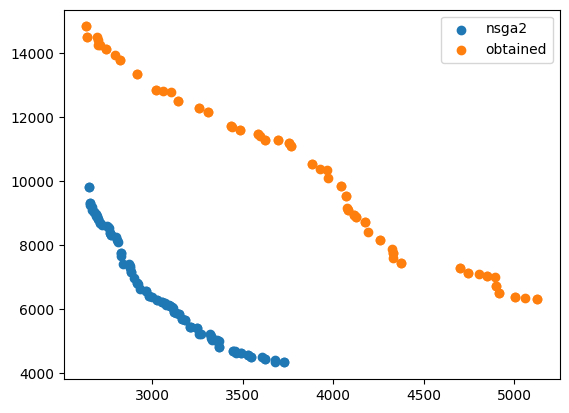

In [3]:
from src.multi_evolutive import PermutationMultiEvolutive
import matplotlib.pyplot as plt

evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    reference_point=(15000, 15000),
)
evolutive = PermutationMultiEvolutive(
    alphabet=range(100),
    n_individuals=50,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= ["uniform", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'],
	T_selection=20,
	p_crossover=0.7,
	average_mutation_rate=1.25,
    maximize=[False, False],
    selection_pool_size=1.5,
	elitism=True,
    evaluation_metrics=evaluation
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=400, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

Generation      500 | Population Elite Points:      108 | Zitlerd: 0.4677 | Spa: 52.6070 | Hrs: 0.3711 | Hv: 108668465.0486
Generation     1000 | Population Elite Points:      133 | Zitlerd: 0.5258 | Spa: 58.0822 | Hrs: 0.1076 | Hv: 122858571.8035
Generation     1500 | Population Elite Points:      147 | Zitlerd: 0.5551 | Spa: 44.8084 | Hrs: 0.1809 | Hv: 130463455.0194
Generation     2000 | Population Elite Points:      181 | Zitlerd: 0.5789 | Spa: 56.2165 | Hrs: 0.1059 | Hv: 134141911.0667


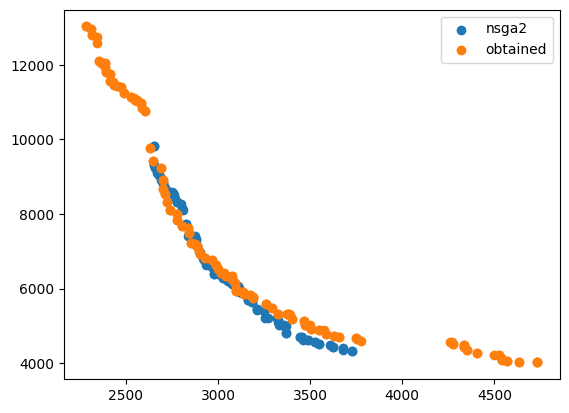

In [4]:
from src.multi_evolutive import RealMultiEvolutive
import matplotlib.pyplot as plt
import numpy as np

evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    reference_point=(15000, 15000),
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=100,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=[('best', 1), ('section', 2)], # , ('best', 4)],
    selection_pool_size=1.,
    average_mutation_rate=1.,
    mutation_eps=.5,
    elitism=True,
    alpha=0.6,
    T_selection=10,
    evaluation_metrics=evaluation
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=500, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

Generation      200 | Population Elite Points:       38 | Zitlerd: 0.8434 | Spa: 151.0493 | Hrs: 0.1671 | Hv: 72099881.2815
--------------
Generation      200 | Population Elite Points:       31 | Zitlerd: 0.6015 | Spa: 255.6673 | Hrs: 0.1970 | Hv: 87512626.5988
--------------
Generation      200 | Population Elite Points:       46 | Zitlerd: 0.7193 | Spa: 182.0844 | Hrs: 0.1191 | Hv: 88668625.5457
--------------
Generation      200 | Population Elite Points:       41 | Zitlerd: 0.7415 | Spa: 200.2043 | Hrs: 0.1175 | Hv: 94859500.0534
--------------
Generation      200 | Population Elite Points:       51 | Zitlerd: 0.7214 | Spa: 202.4195 | Hrs: 0.1362 | Hv: 99421005.6761
--------------
Generation      200 | Population Elite Points:       45 | Zitlerd: 0.8541 | Spa: 259.0467 | Hrs: 0.1400 | Hv: 100724479.6395
--------------
Generation      200 | Population Elite Points:       47 | Zitlerd: 0.7008 | Spa: 168.6784 | Hrs: 0.1235 | Hv: 104167100.5178
--------------
Generation      200 | Pop

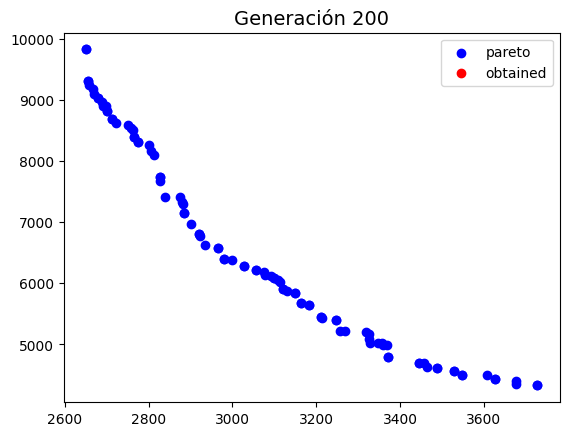

In [5]:
from IPython.display import HTML
import examples.multi_animation as multi_anm

GENERATIONS = 2000
IND_PER_GENERATION = 200

animation = multi_anm.Animation(problem, GENERATIONS, IND_PER_GENERATION)

anim = animation.evolve_step_by_step(evolutive, fit=problem.evaluate, trace=200, pareto_like=res2.F)

HTML(anim.to_html5_video())

In [ ]:
multi_obj.plot_multiple_pareto_fronts(
    fronts_dict={
        "nsga2_1000": res2.F,
        "obtained": fit_scores
    },
)

In [ ]:
from examples.tsp_multi import TSPProblem
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import GridSearch, MultiObjectiveEvaluation

problem = TSPProblem(100)
evolution_metric = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    reference_point=(15000, 6000),
)
static_evolution_kwargs ={
    "value_range": [0, 1],
    "maximize": [False, False],
    "cromolength": 100,
    "front": 'front',
    "penalization": 'crowding_norm',
    "selection_pool_size": 1.,
    "elitism":True,
    "T_selection": 8
}
evolution_kwargs = {
    "mutation": ["random-range", "random-local"],
    "crossover": ["blx", "uniform", "blx-alpha", "split-merge"],
    "selection_pool": [(('best', 1), ('section', 2)), ('best', 'roulette'), (('roulette', 1), ('section', 2))],
    "average_mutation_rate": [1., 1.25],
    "mutation_eps": [0.5, 0.75],
    "alpha": [0.4, 0.6],
}

grid = GridSearch(
    save_file_name='./evaluations/tsp_multi',
    result_names='tspm',
    fit=problem.evaluate,
    n_individuals=50,
    n_generations=2000,
    n_iterations=10,
    Evolution=RealMultiEvolutive,
    static_evolution_kwargs=static_evolution_kwargs,
    evolution_kwargs=evolution_kwargs,
    evolution_metric=evolution_metric,
    exclude_combinations_list=(1,)
)

In [ ]:
grid.search()